# Diasaggregate your Home/Building Mains Meter Data

### This notebook demonstrates the use of siteonlyapi - a new NILMTK interface which is a modification of NILMTK's ExperimentAPI. It allows NILMTK users to get their home/buildings energy demands for different potential appliances.

Lets us start with a very simple experiment to demonstrate the use of this API. This experiment shows how the user can convert their meter data into proper REDD format, and call the API  to disaggregate the energy into appliance demands based on the training set.


Convert meter data into proper format

In [2]:
from nilmtk.dataset_converters.caxe import convert_caxe

In [3]:
convert_caxe('ac_seconds4.csv')

Loading  1
Done converting YAML metadata to HDF5!
Done converting test data to HDF5!


import different algorithms for disaggregations

In [4]:
from nilmtk.disaggregate import Hart85
from nilmtk.disaggregate import Mean
from nilmtk.disaggregate import CO
from nilmtk.disaggregate import FHMMExact

Here you may change the start and end dates of your test data set and also, we enter the values for the different parameters in the dictionary. Since we need multiple appliances, we enter the names of all the required appliances in the 'appliances' parameter. Also we mention site_only to be true because we want to disaggregate the site meter data only without any comparison with submeter data.

In [5]:
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 60,
    'appliances': ['air conditioner','fridge','washing machine','clothes iron','television'],
    'methods': {"CO":CO({}),"FHMM":FHMMExact({'num_of_states':2}),'Mean':Mean({}),'Hart':Hart85({})},
    'site_only' : True,
  'train': {    
    'datasets': {
        'iAWE': {
            'path': './iAWE.h5',
            'buildings': {
                1: {
                    'start_time': '2013-07-13', 
                    'end_time': '2013-08-04'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'CAXE': {
            'path': './test.h5',
            'buildings': {
                1: {
                    'start_time': '2020-08-12',
                    'end_time': '2020-08-14'
                    }
                }
            }
        },
        'metrics':['rmse']
    }
}

In [6]:
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

Joint Testing for all algorithms
Loading data for  CAXE  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : FHMMvision'n'ne'
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


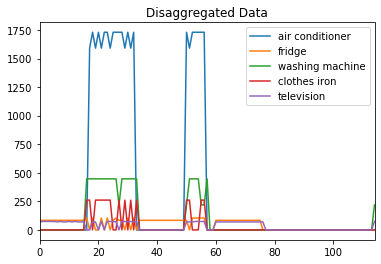

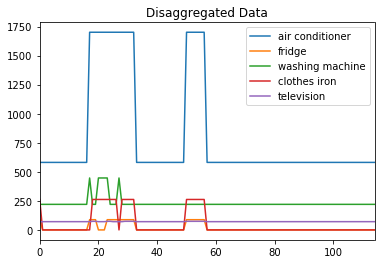

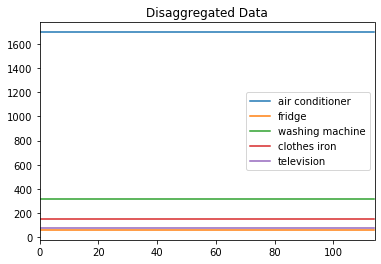

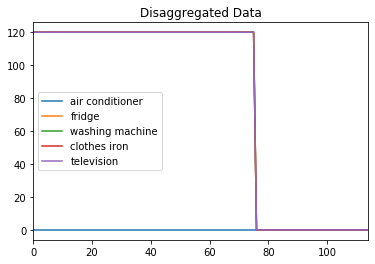

In [7]:
api_results_experiment_1 = API(experiment1)

In [8]:
df = (api_results_experiment_1.pred_overall['CO'])

Getting Predictions Dataframe

In [9]:
df

,air conditioner,fridge,washing machine,clothes iron,television
0,0.0,84.0,0.0,0.0,70.0
1,0.0,84.0,0.0,0.0,74.0
2,0.0,84.0,0.0,0.0,74.0
3,0.0,84.0,0.0,0.0,74.0
4,0.0,84.0,0.0,0.0,74.0
...,...,...,...,...,...
110,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0
